In [1]:
import pandas as pd

df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")

In [2]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14], axis=0, ignore_index = True)
df.shape

(45343, 2)

In [3]:
# 결측치 제거
df = df.dropna(axis = 0)
df.shape

(44732, 2)

In [4]:
# 데이터 중복 유무 확인
df['sentence'].nunique(), df['score'].nunique()

# 중복 제거
df.drop_duplicates(subset=['sentence'], inplace=True)
print('총 샘플 수 :',len(df))

총 샘플 수 : 43950


<AxesSubplot:>

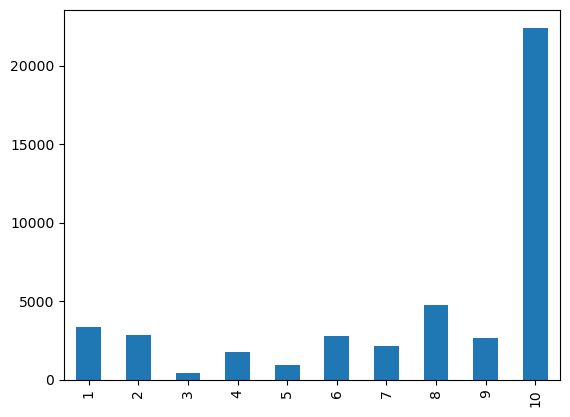

In [5]:
# 데이터 분포 확인
df['score'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [12]:
def rating_to_label(score):
    if score >= 8:
        return 1
    if score <= 3:
        return 0
    
df['y'] = df['score'].apply(lambda x: rating_to_label(x))

In [43]:
df = df.dropna(axis=0).reset_index(inplace=False, drop=True) 
df.shape

(36391, 3)

In [44]:
df["y"].value_counts()

1    29786
0     6605
Name: y, dtype: int64

In [45]:
df.head()

,sentence,score,y
0,"연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움",9,1
1,나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...,8,1
2,넷플로시청하기에 10점~배우분들 매력 최고,10,1
3,이걸 영화라고....,1,0
4,너무 재밌어요 크리스마스때 그냥 개봉하시지 ㅠㅅㅠ 흥했으면 좋겠습니다,10,1


In [46]:
df['score'].value_counts().sort_index(ascending=True)

1      3321
2      2858
3       426
8      4723
9      2628
10    22435
Name: score, dtype: int64

<AxesSubplot:>

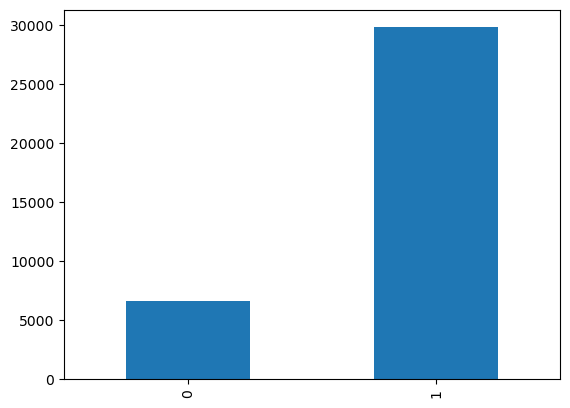

In [48]:
df['y'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [49]:
# 패키지 설치
import pandas as pd
#warning 메시지 표시 안함
import warnings
warnings.filterwarnings(action = 'ignore')

# Train 데이터 불러오기
train_df = df

# 데이터 확인
print(train_df.head())

                                            sentence  score  y
0                      연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움      9  1
1  나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...      8  1
2                            넷플로시청하기에 10점~배우분들 매력 최고     10  1
3                                        이걸 영화라고....      1  0
4            너무 재밌어요 크리스마스때 그냥 개봉하시지 ㅠㅅㅠ 흥했으면 좋겠습니다      10  1


In [64]:
text = train_df['sentence']
score = train_df['y']

In [65]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(text, score , test_size=0.2, random_state=0)
print(len(train_x), len(train_y), len(test_x), len(test_y))

29112 29112 7279 7279


In [66]:
train = pd.concat([train_x, train_y], axis=1).reset_index(inplace=False, drop=True) 
train.head()

,sentence,y
0,나는 재미도 감동도 없었다 그냥 조폭 양아치 설치는 영화…,0
1,모든게다 완벽했던것같음 연기도 몰입감있었고 무엇보다 연출때문에 많이 울었음 여주가 ...,1
2,보통 애니는 음향과 스피디한 전개로 매료 시키는데 이건 침묵속에 오히려 응원하는 소...,1
3,나 진짜 영화관에서 이렇게까지 많이 울컥하면서 본 영화는 처음이다 아직도 왜 다 아...,1
4,아주 몰입하여 재미있게 본 새로운 SF영화. 초반부 류경수 배우의 연기의 약간 과장...,1


In [67]:
test = pd.concat([test_x, test_y], axis=1).reset_index(inplace=False, drop=True) 
test.head()

,sentence,y
0,좋아요,1
1,슬램덩크 세대로서 영화는 최고였다.신파만 없었어도 더 완벽했겠지만단 같은관 아주머니...,1
2,108분간의 교섭.. 기대 안하고 봤는데... 액션은 말할 것도 없고 사막 로케이션...,1
3,대사 쓴 사람 직업 바꿔라 진짜,0
4,가족끼리 보기 딱좋고훈훈한 내용이에요ㅎㅎ,1


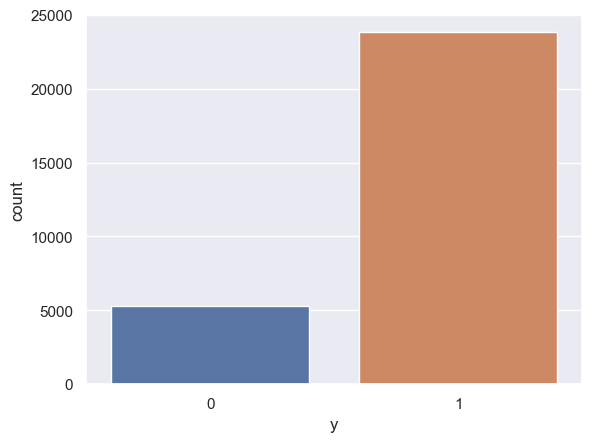

In [68]:
import seaborn as sns

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="y", data=train)

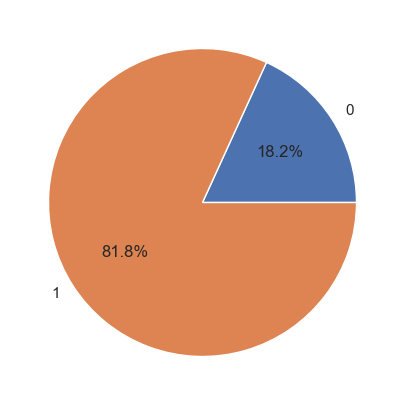

In [76]:
import numpy as np
import matplotlib.pyplot as plt

y, frequencies = np.unique(train.y.values, return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(frequencies, labels = y, autopct= '%1.1f%%')
plt.show()

## 전처리

In [87]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [88]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [90]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

In [91]:
from tqdm import tqdm

for review in tqdm(train['sentence']):
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

100%|███████████████████████████████████████████████████████████████████████████| 29112/29112 [02:12<00:00, 220.00it/s]


[['나', '재미', '도', '감동', '도', '없다', '그냥', '조폭', '양', '아치', '설치다', '영화'],
 ['모든',
  '게다',
  '완벽하다',
  '같다',
  '연기',
  '도',
  '몰입',
  '가다',
  '무엇',
  '보다',
  '연출',
  '때문',
  '에',
  '많이',
  '울다',
  '여주',
  '하다',
  '말',
  '하나',
  '하나',
  '다',
  '슬프다',
  '여',
  '주베',
  '프',
  '여주',
  '에게',
  '하다',
  '말',
  '하나',
  '하나',
  '내',
  '오',
  '열',
  '버튼',
  '이다',
  '보다',
  '다시',
  '보다',
  '그렇다',
  '영화'],
 ['보통',
  '애니',
  '음향',
  '과',
  '스피디',
  '전개',
  '로',
  '매료',
  '시키다',
  '이건',
  '침묵',
  '속',
  '에',
  '오히려',
  '응원',
  '하다',
  '소리',
  '죽이다',
  '놓다',
  '몰입',
  '시키다',
  '함성',
  '이렇다',
  '없다',
  '몰입도',
  '장난',
  '아니다',
  '천천히',
  '기어',
  '푸다',
  '막판',
  '엔',
  '숨소리',
  '도',
  '죽이다',
  '되다'],
 ['나',
  '진짜',
  '영화관',
  '에서',
  '이렇게',
  '까지',
  '많이',
  '울컥',
  '하다',
  '보다',
  '영화',
  '처음',
  '이다',
  '아직도',
  '왜',
  '다',
  '알다',
  '내용',
  '인데',
  '도',
  '손',
  '에',
  '땀',
  '이나고',
  '눈물',
  '나오다',
  '이해',
  '안되다']]

In [92]:
#테스트 리뷰도 동일하게 전처리
clean_test_review = []
for review in tqdm(test['sentence']):
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

100%|█████████████████████████████████████████████████████████████████████████████| 7279/7279 [00:33<00:00, 216.58it/s]


## 문자로 되어있는 리뷰데이터를 인덱스 벡터로 변환

In [93]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train['y'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test['y'])

## 전처리 완료된 데이터 넘파이 파일로 저장

In [94]:
DEFAULT_PATH  = '/content/sample_data/' # 경로지정
DATA_PATH = 'CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

## 학습데이터 및 전처리 데이터 불러오기

In [95]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = '/content/sample_data/CLEAN_DATA/'
DATA_OUT = '/content/sample_data/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

## 파라미터 세팅하기

In [96]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

## 모델 함수 만들기

In [97]:
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))
    

  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

## 학습하기

In [107]:
from tensorflow.keras.models import save_model

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'\weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])
# 모델 저장하기
save_model(model,'C:/Users/user/model')

/content/sample_data/DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/10
51/52 [============================>.] - ETA: 0s - loss: 0.4464 - accuracy: 0.8130
Epoch 1: val_accuracy improved from -inf to 0.81593, saving model to /content/sample_data/DATA_OUT/cnn_classifier_kr\weights.h5
52/52 [==============================] - 6s 81ms/step - loss: 0.4459 - accuracy: 0.8131 - val_loss: 0.3683 - val_accuracy: 0.8159
Epoch 2/10
51/52 [============================>.] - ETA: 0s - loss: 0.2933 - accuracy: 0.8692
Epoch 2: val_accuracy improved from 0.81593 to 0.87912, saving model to /content/sample_data/DATA_OUT/cnn_classifier_kr\weights.h5
52/52 [==============================] - 4s 76ms/step - loss: 0.2931 - accuracy: 0.8694 - val_loss: 0.2892 - val_accuracy: 0.8791
Epoch 3/10
51/52 [============================>.] - ETA: 0s - loss: 0.2096 - accuracy: 0.9179
Epoch 3: val_accuracy did not improve from 0.87912
52/52 [==============================] - 4s 72ms/step - loss: 0.2097 - ac

INFO:tensorflow:Assets written to: C:/Users/user/model\assets


INFO:tensorflow:Assets written to: C:/Users/user/model\assets


## 평가하기

In [108]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('C:/content/sample_data/DATA_OUT/cnn_classifier_kr/weights.h5')
model.evaluate(test_input, test_label_data)

228/228 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.8856


[0.295284628868103, 0.8855612277984619]

## 예측하기

In [133]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('/content/sample_data/CLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights('/content/sample_data/DATA_OUT/cnn_classifier_kr/weights.h5') #모델 불러오기
predictions = model.predict(pad_new)
predictions = float(predictions.squeeze(-1)[1])

if(predictions > 0.5):
  print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions * 100))
else:
  print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - predictions) * 100))

감성분석할 문장을 입력해 주세요.:  슬램덩크 낭만이 있는 남편을 위해 보러간 영화..기대만큼의 큰 감동은 아니었지만 영화 초반 스케치씬만으로 심금을 울리는 영화인건 분명합니다


1/1 [==============================] - 0s 105ms/step
97.35% 확률로 긍정 리뷰입니다.

